### Making necessary imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

%matplotlib inline
sns.set_style('darkgrid')

### Using 'yfinance' library to extract history of Tata Motors, Tata Steel and TCS stocks

In [46]:
s1 = yf.Ticker('TATAMOTORS.NS')
s2 = yf.Ticker('TATASTEEL.NS')
s3 = yf.Ticker('TCS.NS')

tatamotors = s1.history(period='15y')
tatamotors.insert(0, 'Date', tatamotors.index)
tatamotors['Date'] = tatamotors['Date'].dt.strftime("%Y-%m-%d")
tatamotors['Date'] = pd.to_datetime(tatamotors['Date'])
tatamotors.index=tatamotors['Date']

tatasteel = s2.history(period='15y')
tatasteel.insert(0, 'Date', tatasteel.index)
tatasteel["Date"] = tatasteel['Date'].dt.strftime("%Y-%m-%d")
tatasteel['Date'] = pd.to_datetime(tatasteel['Date'])
tatasteel.index=tatasteel['Date']

tcs = s3.history(period='15y')
tcs.insert(0, 'Date', tcs.index)
tcs["Date"] = tcs['Date'].dt.strftime("%Y-%m-%d")
tcs['Date'] = pd.to_datetime(tcs['Date'])
tcs.index=tcs['Date']

In [47]:
tatamotors.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2008-06-23,2008-06-23,86.616872,87.943584,84.909830,86.705315,3005511,0.0,0.0
2008-06-24,2008-06-24,86.678793,87.492511,84.113804,85.475899,3272384,0.0,0.0
2008-06-25,2008-06-25,85.617417,85.758934,80.664346,83.875000,2821350,0.0,0.0
2008-06-26,2008-06-26,85.263620,87.474809,81.946825,86.324989,10557223,0.0,0.0
2008-06-27,2008-06-27,82.433312,82.433312,76.949548,78.603523,4251669,0.0,0.0


In [48]:
# tatamotors = pd.read_csv('data/TATAMOTORS.csv')
# tatasteel = pd.read_csv('data/TATASTEEL.csv')
# tcs = pd.read_csv('data/TCS.csv')
print(tatasteel.shape, tatamotors.shape, tcs.shape)

(3698, 8) (3698, 8) (3698, 8)


### Preprocessing and Data Cleaning

In [49]:
tcs.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2008-06-23,2008-06-23,160.517148,163.415884,156.642889,159.513748,3572312,0.0,0.0
2008-06-24,2008-06-24,157.943642,161.232588,153.000939,156.903076,9287176,0.0,0.0
2008-06-25,2008-06-25,156.085538,164.447263,154.468935,162.923569,5914196,0.0,0.0
2008-06-26,2008-06-26,164.261399,166.862824,159.876145,163.768982,7028316,0.0,0.0
2008-06-27,2008-06-27,163.768987,163.768987,158.157351,160.823807,6260948,0.0,0.0


In [50]:
tatamotors.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [51]:
tatasteel.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [52]:
tcs.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [53]:
tatamotors.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [54]:
print(tatamotors.duplicated().sum())
print(tatasteel.duplicated().sum())
print(tcs.duplicated().sum())

0
0
0


In [55]:
tatamotors['month'] = tatamotors['Date'].dt.month
tatamotors['year'] = tatamotors['Date'].dt.year
tatamotors['day'] = tatamotors['Date'].dt.day

tatasteel['month'] = tatasteel['Date'].dt.month
tatasteel['year'] = tatasteel['Date'].dt.year
tatasteel['day'] = tatasteel['Date'].dt.day

tcs['month'] = tcs['Date'].dt.month
tcs['year'] = tcs['Date'].dt.year
tcs['day'] = tcs['Date'].dt.day

### Price Comparison

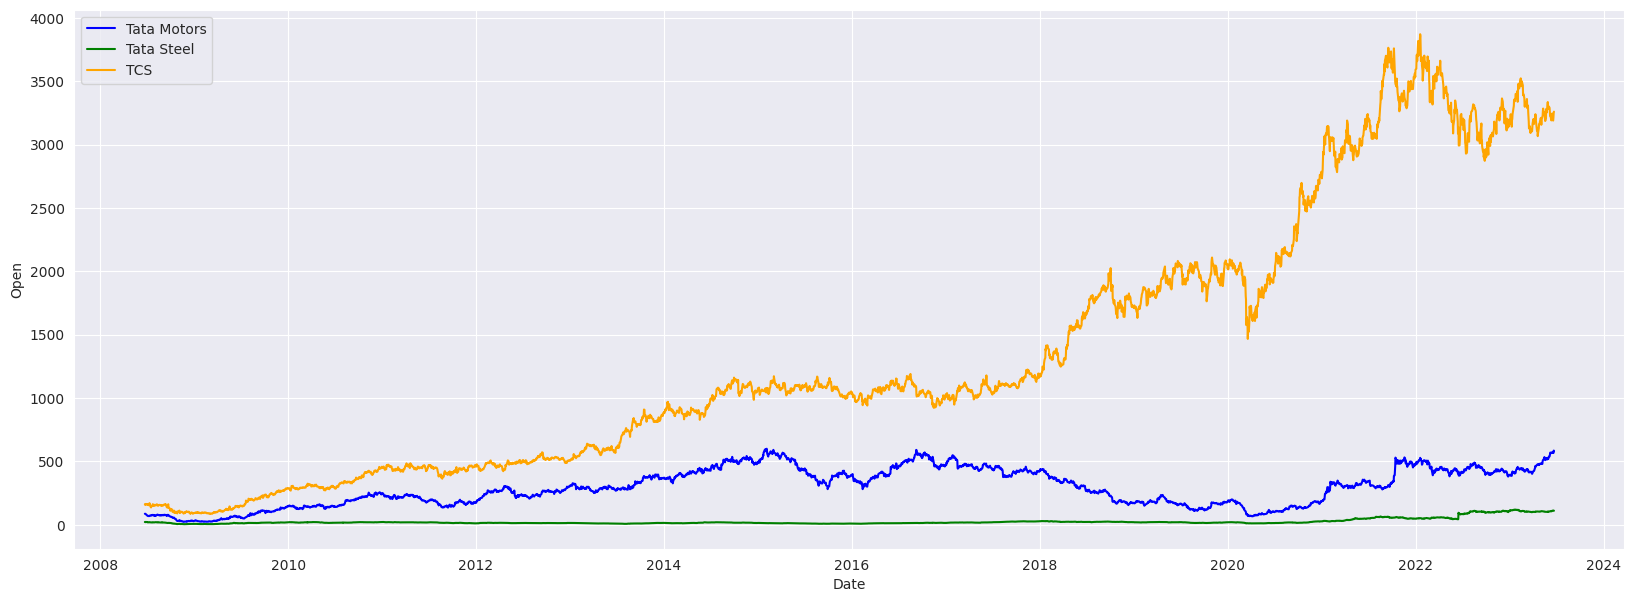

In [56]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=tatamotors, x = 'Date', y = 'Open', label='Tata Motors', color='blue')
sns.lineplot(data=tatasteel, x = 'Date', y = 'Open', label='Tata Steel', color='green')
sns.lineplot(data=tcs, x = 'Date', y = 'Open', label='TCS', color='orange')

plt.legend(loc='upper left')
plt.show()

### Volume Comparison

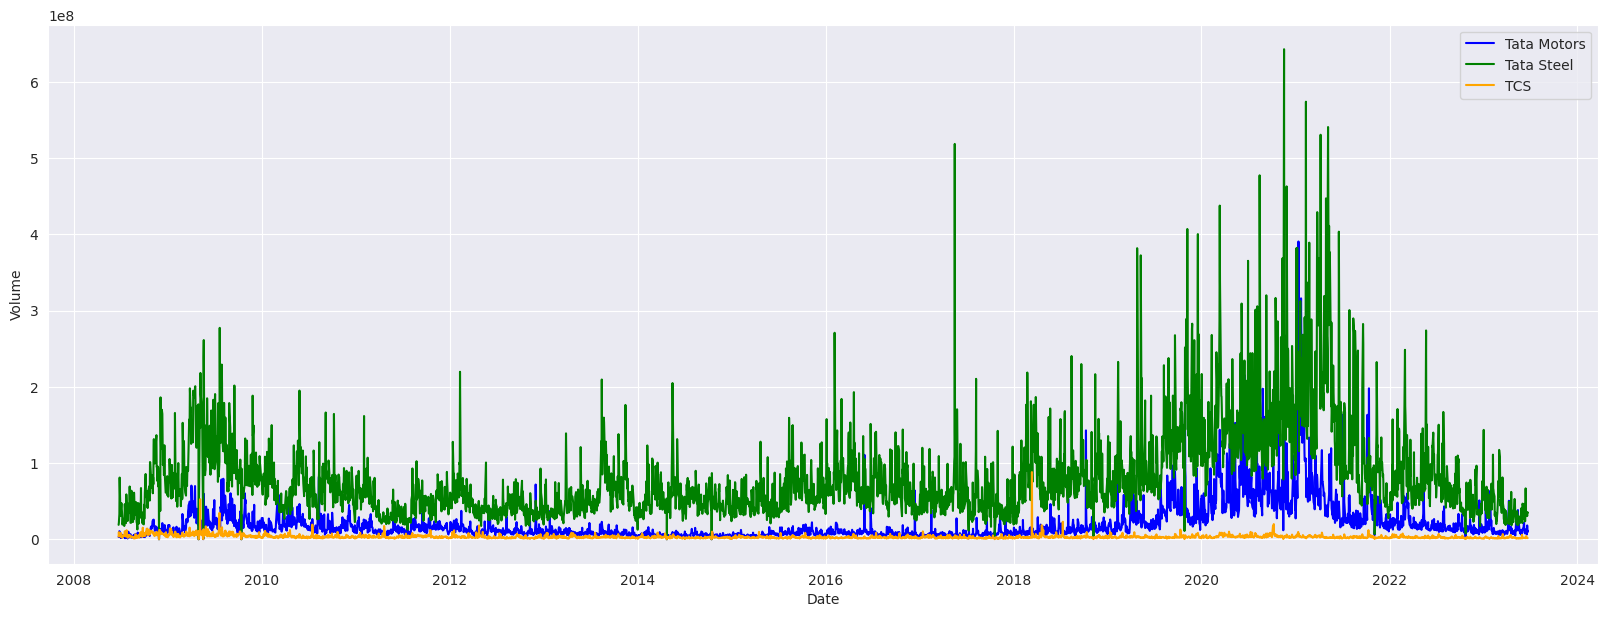

In [57]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=tatamotors, x = 'Date', y = 'Volume',color = 'blue', label='Tata Motors')
sns.lineplot(data=tatasteel, x = 'Date', y = 'Volume',color = 'green', label = 'Tata Steel')
sns.lineplot(data=tcs, x = 'Date', y = 'Volume',color = 'orange', label='TCS')
plt.legend()

plt.show()

### ROI (Return on Investment)

In [58]:
tatasteel.tail(1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,month,year,day
Date,,,,,,,,,,,
2023-06-22,2023-06-22,110.599998,112.199997,110.550003,111.099998,34747793,3.6,0.0,6,2023,22


In [59]:
x = tcs.head(70).copy()

In [60]:
print(x[x['day'] == 25])
xsum = x[x['day'] == 25]['Low'].sum()
print(xsum)

                 Date        Open        High         Low       Close  \
Date                                                                    
2008-06-25 2008-06-25  156.085538  164.447263  154.468935  162.923569   
2008-07-25 2008-07-25  148.504257  157.850807  145.308217  148.504257   
2008-08-25 2008-08-25  153.661936  155.713249  152.170073  152.580338   
2008-09-25 2008-09-25  132.980966  134.239726  125.139362  128.374847   

              Volume  Dividends  Stock Splits  month  year  day  
Date                                                             
2008-06-25   5914196        0.0           0.0      6  2008   25  
2008-07-25   8842536        0.0           0.0      7  2008   25  
2008-08-25    942244        0.0           0.0      8  2008   25  
2008-09-25  15122632        0.0           0.0      9  2008   25  
577.0865875370158


In [61]:
x[x['day'] == 25].shape[0]

4

In [62]:
def roi(df):
    sum = 0  #total amount invested
    shares = 0  #number of shares owned

    #calculate total amount invested and numebr of shares owned
    # for i in range(len(df)):
    #     if df.loc[i, 'day'] == 30:
    #         sum += df.loc[i, 'Open']
    #         shares += 1

    sum = df[df['day'] == 30]['Open'].sum()
    shares = df[df['day'] == 30].shape[0]

    print("Total Invested in Company = Rs ",round(sum,2))
    print("Shares Owned of Company = ",shares)
    print("Average Investment of 1 share = Rs ",round((sum/shares),2))

    end = df.loc[df.index[-1], 'Open']

    #calculating investment results.
    res = round((end*shares)-sum, 2)
    res_roi = round((res/sum)*100, 2)

    #displaying results
    print("\ninvestment results: ")
    if(res < 0):
        print("net unrealised loss = Rs ", res)
    else:
        print("net unrealised profit = Rs ", res)

    print(f'Company\'s ROI from 2000-01-03 to 2021-04-30 = {res_roi} %')

    return res, shares

In [63]:
r_tatamotors, s_tatamotors = roi(tatamotors)

Total Invested in Company = Rs  33042.11
Shares Owned of Company =  115
Average Investment of 1 share = Rs  287.32

investment results: 
net unrealised profit = Rs  34117.89
Company's ROI from 2000-01-03 to 2021-04-30 = 103.26 %


In [64]:
r_tatasteel, s_tatasteel = roi(tatasteel)

Total Invested in Company = Rs  2739.2
Shares Owned of Company =  115
Average Investment of 1 share = Rs  23.82

investment results: 
net unrealised profit = Rs  9979.8
Company's ROI from 2000-01-03 to 2021-04-30 = 364.33 %


In [65]:
r_tcs, s_tcs = roi(tcs)

Total Invested in Company = Rs  150408.32
Shares Owned of Company =  115
Average Investment of 1 share = Rs  1307.9

investment results: 
net unrealised profit = Rs  224491.68
Company's ROI from 2000-01-03 to 2021-04-30 = 149.25 %


<Axes: title={'center': 'Profit/Loss'}, xlabel='Stocks', ylabel='Amount'>

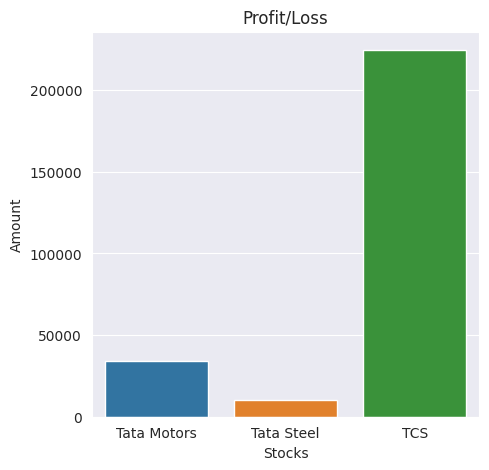

In [66]:
plt.figure(figsize=(5, 5))

stock = ['Tata Motors', 'Tata Steel', 'TCS']
amt = [r_tatamotors, r_tatasteel, r_tcs]
plt.title('Profit/Loss')
plt.xlabel('Stocks')
plt.ylabel('Amount')

sns.barplot(x=stock, y=amt)

### Portfolio Allocation

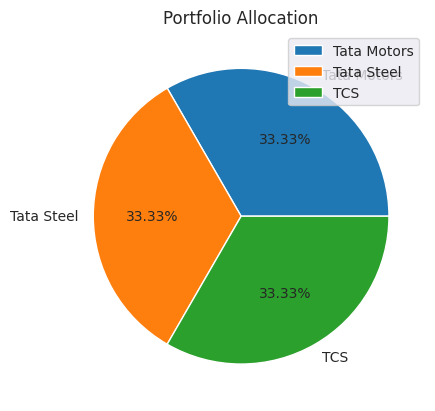

In [67]:
stock = ['Tata Motors', 'Tata Steel', 'TCS']
shares = [s_tatamotors, s_tatasteel, s_tcs]

plt.pie(shares, labels = stock, autopct='%1.2f%%')
plt.legend(title='')
plt.title('Portfolio Allocation')
plt.show()

### Stocks Price Predictions using LSTM Neural networks

In [68]:
n = int(tcs.shape[0]*0.8)
d = 60
print(n)

2958


In [69]:
data = tcs.sort_index(ascending=True, axis=0)
ndf = pd.DataFrame(columns=['Date', 'Close'])
ndf['Date'] = data['Date'].copy()
ndf['Close'] = data['Close'].copy()
ndf.drop('Date', inplace=True, axis=1)
finaldataset = ndf.values
ndf.head()

,Close
Date,
2008-06-23,159.513748
2008-06-24,156.903076
2008-06-25,162.923569
2008-06-26,163.768982
2008-06-27,160.823807


In [70]:
train_data = finaldataset[0:n, :]
valid_data = finaldataset[n:, :]

scale = MinMaxScaler(feature_range=(0, 1))
scaled_data = scale.fit_transform(finaldataset)

In [71]:
fxtrain, fytrain = [], []
for i in range(d,len(train_data)):
    fxtrain.append(scaled_data[i-d:i,0])
    fytrain.append(scaled_data[i,0])

fxtrain, fytrain = np.array(fxtrain),np.array(fytrain)
fxtrain=np.reshape(fxtrain,(fxtrain.shape[0],fxtrain.shape[1],1))

In [72]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True,input_shape=(fxtrain.shape[1],1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

In [73]:
lstm_model.compile(loss='mse', optimizer='adam')
lstm_model.fit(fxtrain, fytrain, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
91/91 - 16s - loss: 0.0030 - 16s/epoch - 171ms/step
Epoch 2/10
91/91 - 10s - loss: 8.3403e-04 - 10s/epoch - 104ms/step
Epoch 3/10
91/91 - 9s - loss: 6.9886e-04 - 9s/epoch - 95ms/step
Epoch 4/10
91/91 - 9s - loss: 6.9293e-04 - 9s/epoch - 99ms/step
Epoch 5/10
91/91 - 9s - loss: 6.5207e-04 - 9s/epoch - 104ms/step
Epoch 6/10
91/91 - 10s - loss: 7.0179e-04 - 10s/epoch - 105ms/step
Epoch 7/10
91/91 - 8s - loss: 5.3831e-04 - 8s/epoch - 91ms/step
Epoch 8/10
91/91 - 9s - loss: 5.6782e-04 - 9s/epoch - 104ms/step
Epoch 9/10
91/91 - 10s - loss: 5.9463e-04 - 10s/epoch - 105ms/step
Epoch 10/10
91/91 - 8s - loss: 4.7823e-04 - 8s/epoch - 92ms/step


In [74]:
inputs_data=ndf[len(ndf)-len(valid_data)-d:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scale.transform(inputs_data)

In [75]:
X_test=[]
for i in range(d,inputs_data.shape[0]):
    X_test.append(inputs_data[i-d:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scale.inverse_transform(predicted_closing_price)

24/24 [==============================] - 3s 37ms/step


In [76]:
valid_data = ndf[n:].copy()
valid_data['Predictions'] = predicted_closing_price

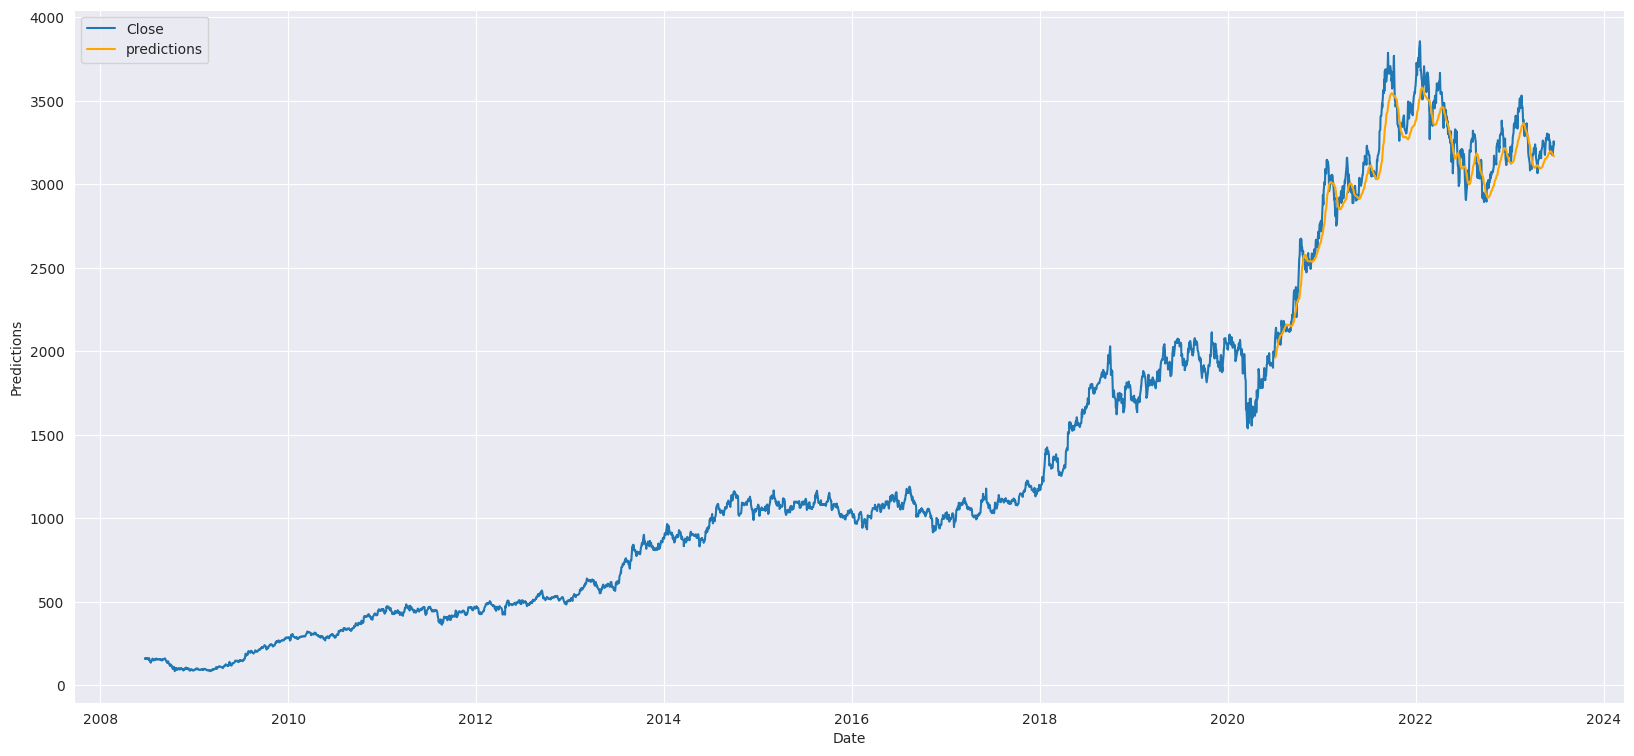

In [77]:
plt.figure(figsize=(20, 9))

sns.lineplot(ndf)
sns.lineplot(valid_data['Predictions'], color='orange', dashes=False, label='predictions')
plt.legend(loc='upper left')
plt.show()

Web App using Gradio

In [ ]:
cname = input()
s1 = yf.Ticker(cname)

df = s1.history(period='15y')
df.insert(0, 'Date', df.index)
df['Date'] = df['Date'].dt.strftime("%Y-%m-%d")
df['Date'] = pd.to_datetime(df['Date'])
df.index=df['Date']

df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day'] = df['Date'].dt.day

In [ ]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x = 'Date', y = 'Close', label=cname, color='blue')
plt.show()

In [109]:
def sol(cname):

    # cname = input()
    s1 = yf.Ticker(cname)

    df = s1.history(period='15y')
    df.insert(0, 'Date', df.index)
    df['Date'] = df['Date'].dt.strftime("%Y-%m-%d")
    df['Date'] = pd.to_datetime(df['Date'])
    df.index=df['Date']

    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['day'] = df['Date'].dt.day

    sum = 0  #total amount invested
    shares = 0  #number of shares owned
    answer = ''

    #calculate total amount invested and numebr of shares owned
    # for i in range(len(df)):
    #     if df.loc[i, 'day'] == 30:
    #         sum += df.loc[i, 'Open']
    #         shares += 1

    sum = df[df['day'] == 30]['Open'].sum()
    shares = df[df['day'] == 30].shape[0]

    print("Total Invested in Company = Rs ",round(sum,2))
    print("Shares Owned of Company = ",shares)
    print("Average Investment of 1 share = Rs ",round((sum/shares),2))

    answer = f"Total Invested in Company = Rs {round(sum, 2)} \n Shares Owned of Company = {shares} \n Average Investment of 1 share = Rs {round(sum/shares, 2)}"

    end = df.loc[df.index[-1], 'Open']

    #calculating investment results.
    res = round((end*shares)-sum, 2)
    res_roi = round((res/sum)*100, 2)

    #displaying results
    print("\ninvestment results: ")
    answer += "\n\ninvestment results:"
    if(res < 0):
        answer += f"\nnet unrealised loss = Rs {res}"
        print("net unrealised loss = Rs ", res)
    else:
        answer += f"\nnet unrealised profit = Rs {res}"
        print("net unrealised profit = Rs ", res)

    print(f'Company\'s ROI from 2000-01-03 to 2021-04-30 = {res_roi} %')
    answer += f'\nCompany\'s ROI from 2000-01-03 to 2021-04-30 = {res_roi} %'
    return answer

In [97]:
# !pip install gradio

In [85]:
import gradio as gr

In [110]:
ifc = gr.Interface(fn=sol, inputs='text', outputs='text', title='stocks')

In [111]:
ifc.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>